<a href="https://colab.research.google.com/github/FJSD08/master-series-forecasting-notebook/blob/main/todos_codigos_forecasting_mestrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Mestrado/DataSet_PZs_ForquilhasV.xlsx')
data

,TIMESTAMP,PZE01,PZE03,PZE04,PZE05,PZE06,PZE07,PZE08,PZE09,PZE10,PZE11,PZE12,PZE13
0,2023-01-17 11:00:00,1.342951,-0.182565,0.029329,-0.030523,-0.413892,0.028997,0.186868,4.332498,3.278466,3.582648,2.035457,4.734820
1,2023-01-17 12:00:00,1.323022,-0.173670,0.030126,-0.032635,-0.420420,0.032528,0.180509,4.326719,3.275582,3.589416,2.039707,4.735727
2,2023-01-17 13:00:00,1.327751,-0.179015,0.043033,-0.037601,-0.430876,0.033393,0.177111,4.325400,3.275379,3.588884,2.035494,4.731488
3,2023-01-17 14:00:00,1.336536,-0.173631,0.042637,-0.028208,-0.422311,0.033751,0.182295,4.332095,3.275108,3.589302,2.035837,4.733491
4,2023-01-17 15:00:00,1.340861,-0.185186,0.039688,-0.033874,-0.421856,0.029028,0.179038,4.337240,3.274470,3.592537,2.034507,4.732096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,2023-07-02 13:00:00,1.650003,-0.167794,0.032550,-0.034736,-0.541352,0.030934,0.172135,4.254673,3.188140,3.658848,2.013674,4.750950
3950,2023-07-02 14:00:00,1.650445,-0.169779,0.032408,-0.032878,-0.540463,0.030565,0.171855,4.255033,3.187416,3.657538,2.013823,4.752974
3951,2023-07-02 15:00:00,1.653503,-0.172255,0.032266,-0.031019,-0.539573,0.030115,0.171576,4.255394,3.186692,3.657295,2.013971,4.754998
3952,2023-07-02 16:00:00,1.656560,-0.174731,0.032124,-0.029161,-0.538684,0.029664,0.171296,4.255754,3.185967,3.657051,2.014120,4.757022


In [ ]:
# Convertendo a coluna 'TIMESTAMP' para o formato datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%d/%m/%Y %H:%M')

# Definindo 'TIMESTAMP' como índice do DataFrame
data.set_index('TIMESTAMP', inplace=True)

In [ ]:
# Supondo que 'data' é um DataFrame Pandas e 'target' é a coluna que você deseja prever
X = data.drop('PZE13', axis=1)  # Substitua 'target' pelo nome real da sua variável dependente
y = data['PZE13']  # Variável dependente

In [ ]:
# Dividir os dados em treino e teste não é tão simples quanto uma divisão aleatória em dados temporais
# Walk-Forward Validation para séries temporais
n_train = int(len(X) * 0.8)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

In [ ]:
data

,PZE01,PZE03,PZE04,PZE05,PZE06,PZE07,PZE08,PZE09,PZE10,PZE11,PZE12,PZE13
TIMESTAMP,,,,,,,,,,,,
2023-01-17 11:00:00,1.342951,-0.182565,0.029329,-0.030523,-0.413892,0.028997,0.186868,4.332498,3.278466,3.582648,2.035457,4.734820
2023-01-17 12:00:00,1.323022,-0.173670,0.030126,-0.032635,-0.420420,0.032528,0.180509,4.326719,3.275582,3.589416,2.039707,4.735727
2023-01-17 13:00:00,1.327751,-0.179015,0.043033,-0.037601,-0.430876,0.033393,0.177111,4.325400,3.275379,3.588884,2.035494,4.731488
2023-01-17 14:00:00,1.336536,-0.173631,0.042637,-0.028208,-0.422311,0.033751,0.182295,4.332095,3.275108,3.589302,2.035837,4.733491
2023-01-17 15:00:00,1.340861,-0.185186,0.039688,-0.033874,-0.421856,0.029028,0.179038,4.337240,3.274470,3.592537,2.034507,4.732096
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 13:00:00,1.650003,-0.167794,0.032550,-0.034736,-0.541352,0.030934,0.172135,4.254673,3.188140,3.658848,2.013674,4.750950
2023-07-02 14:00:00,1.650445,-0.169779,0.032408,-0.032878,-0.540463,0.030565,0.171855,4.255033,3.187416,3.657538,2.013823,4.752974
2023-07-02 15:00:00,1.653503,-0.172255,0.032266,-0.031019,-0.539573,0.030115,0.171576,4.255394,3.186692,3.657295,2.013971,4.754998


In [ ]:
data.describe()

,PZE01,PZE03,PZE04,PZE05,PZE06,PZE07,PZE08,PZE09,PZE10,PZE11,PZE12,PZE13
count,3954.000000,3954.000000,3954.000000,3954.000000,3954.000000,3954.000000,3954.000000,3954.000000,3954.000000,3954.000000,3954.000000,3954.000000
mean,1.631642,-0.177859,0.092353,-0.030839,-0.491273,0.030633,0.174702,4.303773,3.247122,3.696368,2.031834,4.773888
std,0.154156,0.005296,0.061561,0.002960,0.034742,0.002461,0.006286,0.032316,0.036928,0.040562,0.016346,0.019318
min,1.264300,-0.197608,0.009378,-0.040345,-0.546427,0.019005,0.151760,4.246230,3.185243,3.582364,2.009047,4.718867
25%,1.671124,-0.181438,0.037346,-0.032794,-0.517377,0.029016,0.170389,4.278211,3.216255,3.673490,2.018467,4.759869
50%,1.702500,-0.178094,0.072895,-0.030830,-0.504614,0.030733,0.174020,4.296604,3.241746,3.697531,2.027993,4.773411
75%,1.721683,-0.174546,0.137276,-0.028814,-0.461236,0.032259,0.178642,4.328743,3.274981,3.721693,2.040524,4.787236
max,1.778515,-0.159945,0.250715,-0.017691,-0.406186,0.039634,0.200779,4.398793,3.342269,3.787807,2.102749,4.821586


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3954 entries, 2023-01-17 11:00:00 to 2023-07-02 17:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PZE01   3954 non-null   float64
 1   PZE03   3954 non-null   float64
 2   PZE04   3954 non-null   float64
 3   PZE05   3954 non-null   float64
 4   PZE06   3954 non-null   float64
 5   PZE07   3954 non-null   float64
 6   PZE08   3954 non-null   float64
 7   PZE09   3954 non-null   float64
 8   PZE10   3954 non-null   float64
 9   PZE11   3954 non-null   float64
 10  PZE12   3954 non-null   float64
 11  PZE13   3954 non-null   float64
dtypes: float64(12)
memory usage: 401.6 KB


In [ ]:
# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
from plotly.subplots import make_subplots
import plotly.tools as tls
import plotly.figure_factory as ff

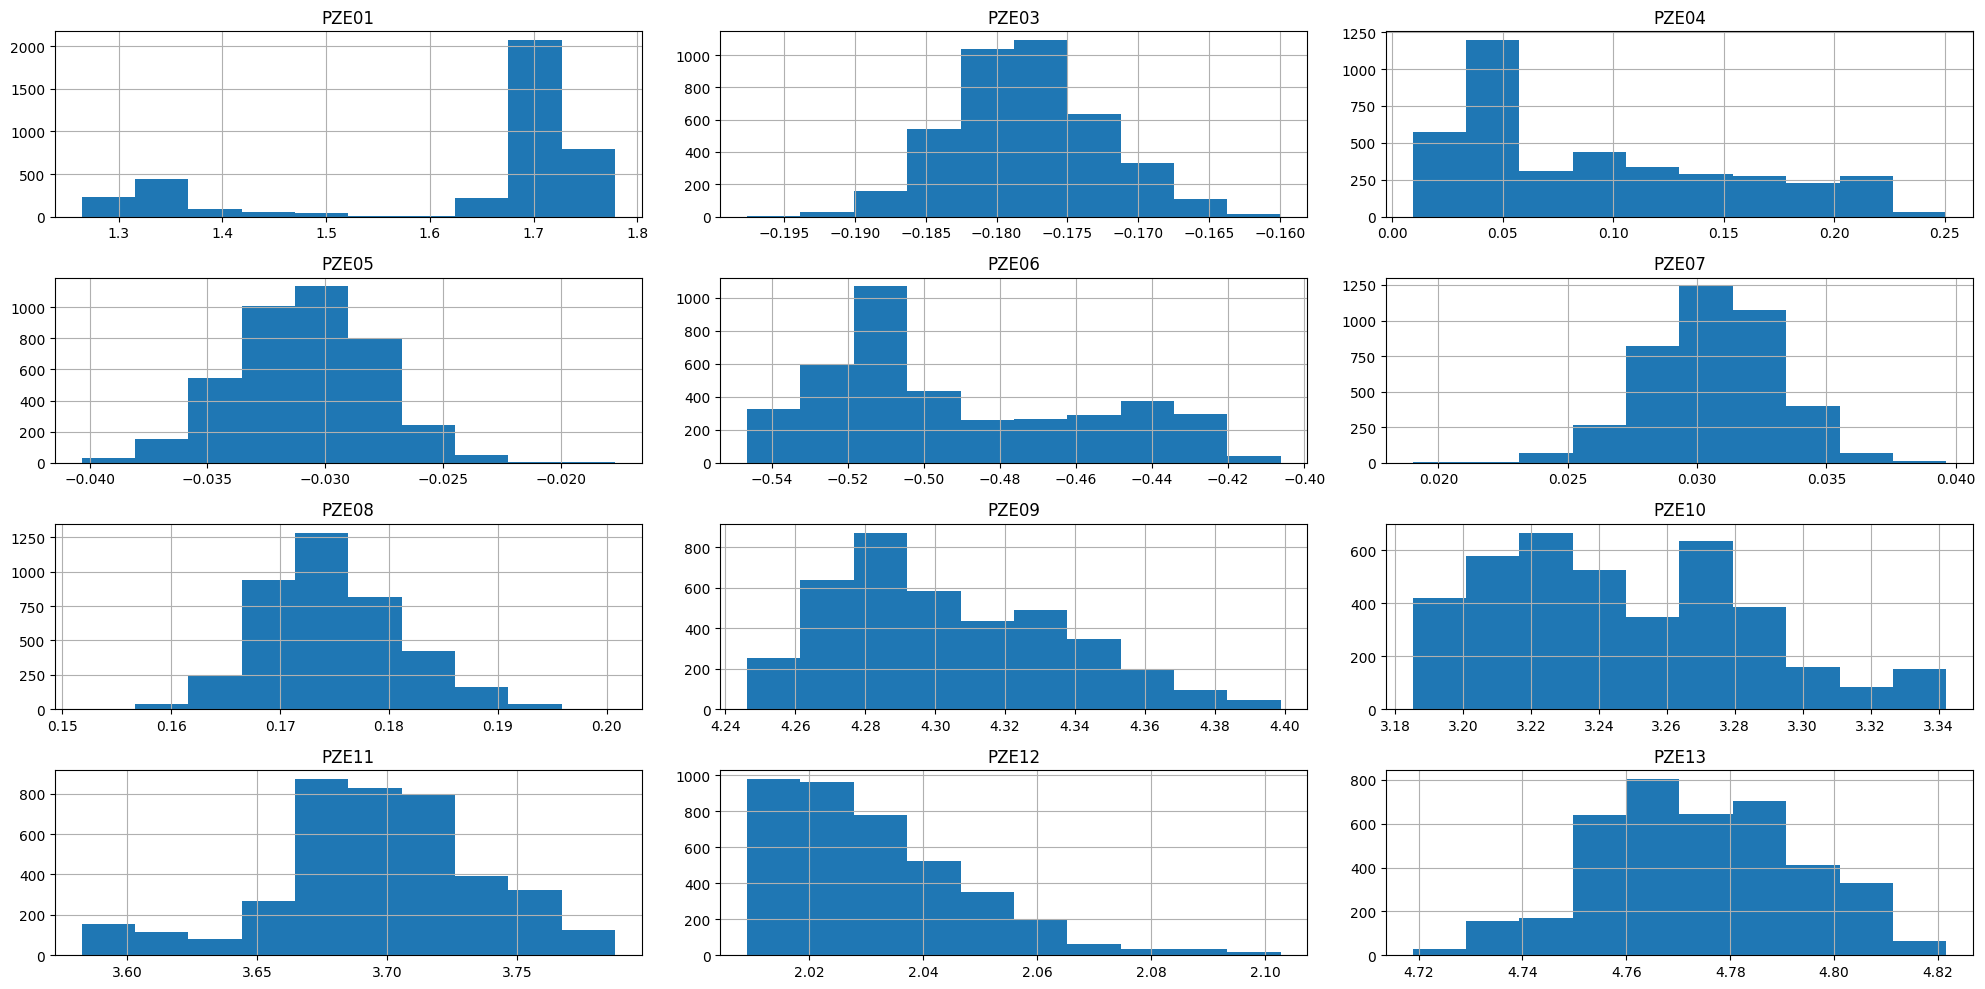

In [ ]:
# Supondo que 'df' seja o nome do seu DataFrame
data.hist(figsize=(20, 10))
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de subplots
plt.show()

In [ ]:
data.shape

(3954, 12)

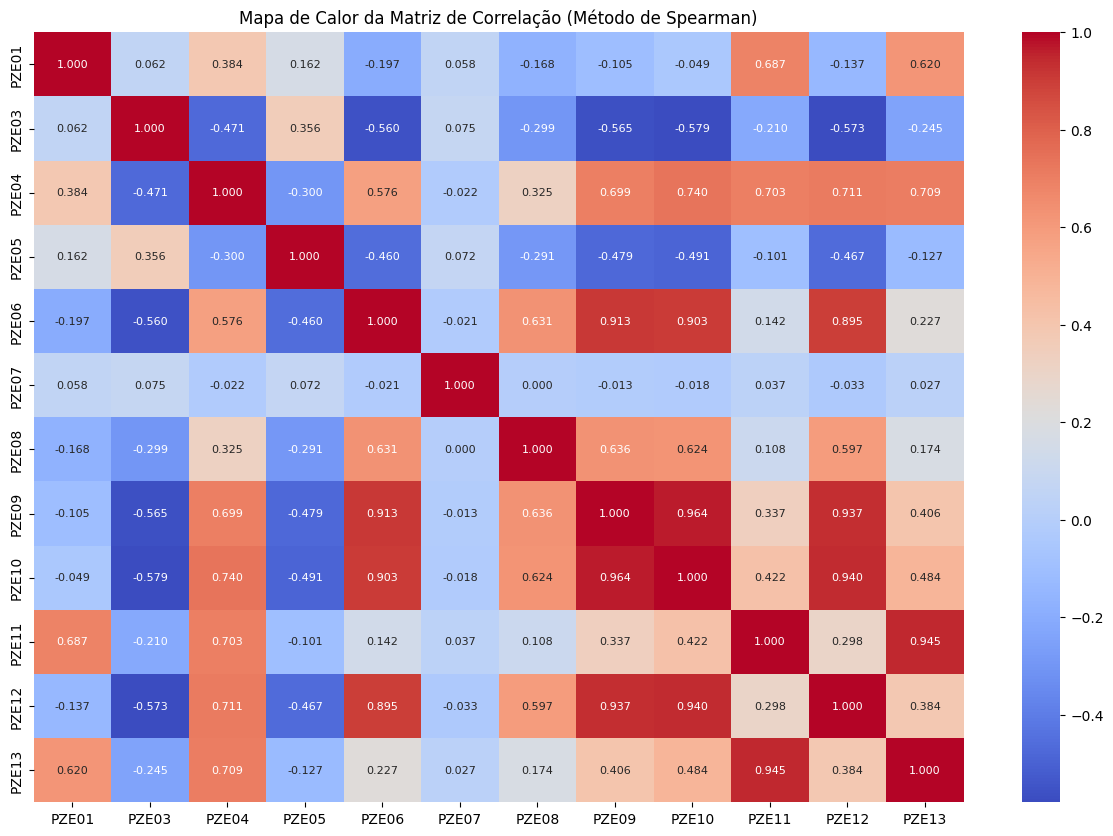

In [ ]:
# Calcular a matriz de correlação usando o método de Spearman
correlation_matrix = data.corr(method='spearman')

# Plotar o heatmap da matriz de correlação com tamanho de fonte menor
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 8})
plt.title('Mapa de Calor da Matriz de Correlação (Método de Spearman)')
plt.show()

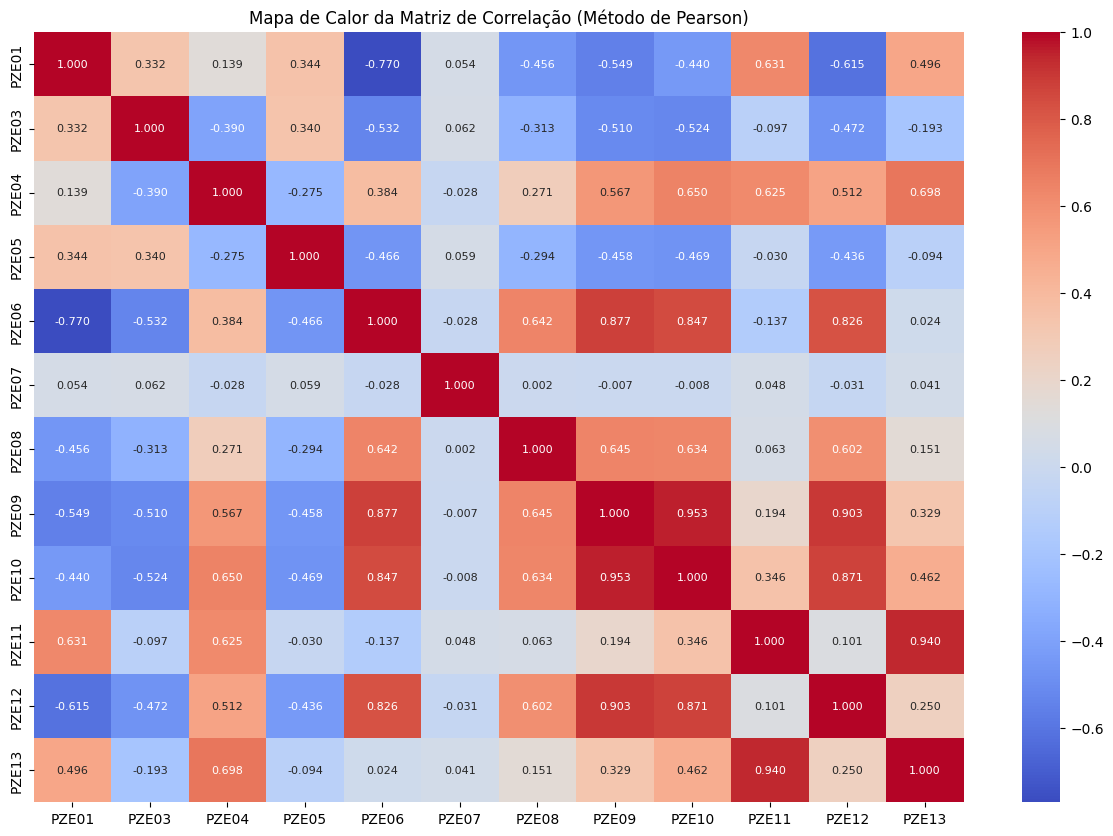

In [ ]:
# Calcular a matriz de correlação usando o método de Pearson
correlation_matrix = data.corr(method='pearson')

# Plotar o heatmap da matriz de correlação com tamanho de fonte menor
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", annot_kws={"size": 8})
plt.title('Mapa de Calor da Matriz de Correlação (Método de Pearson)')
plt.show()

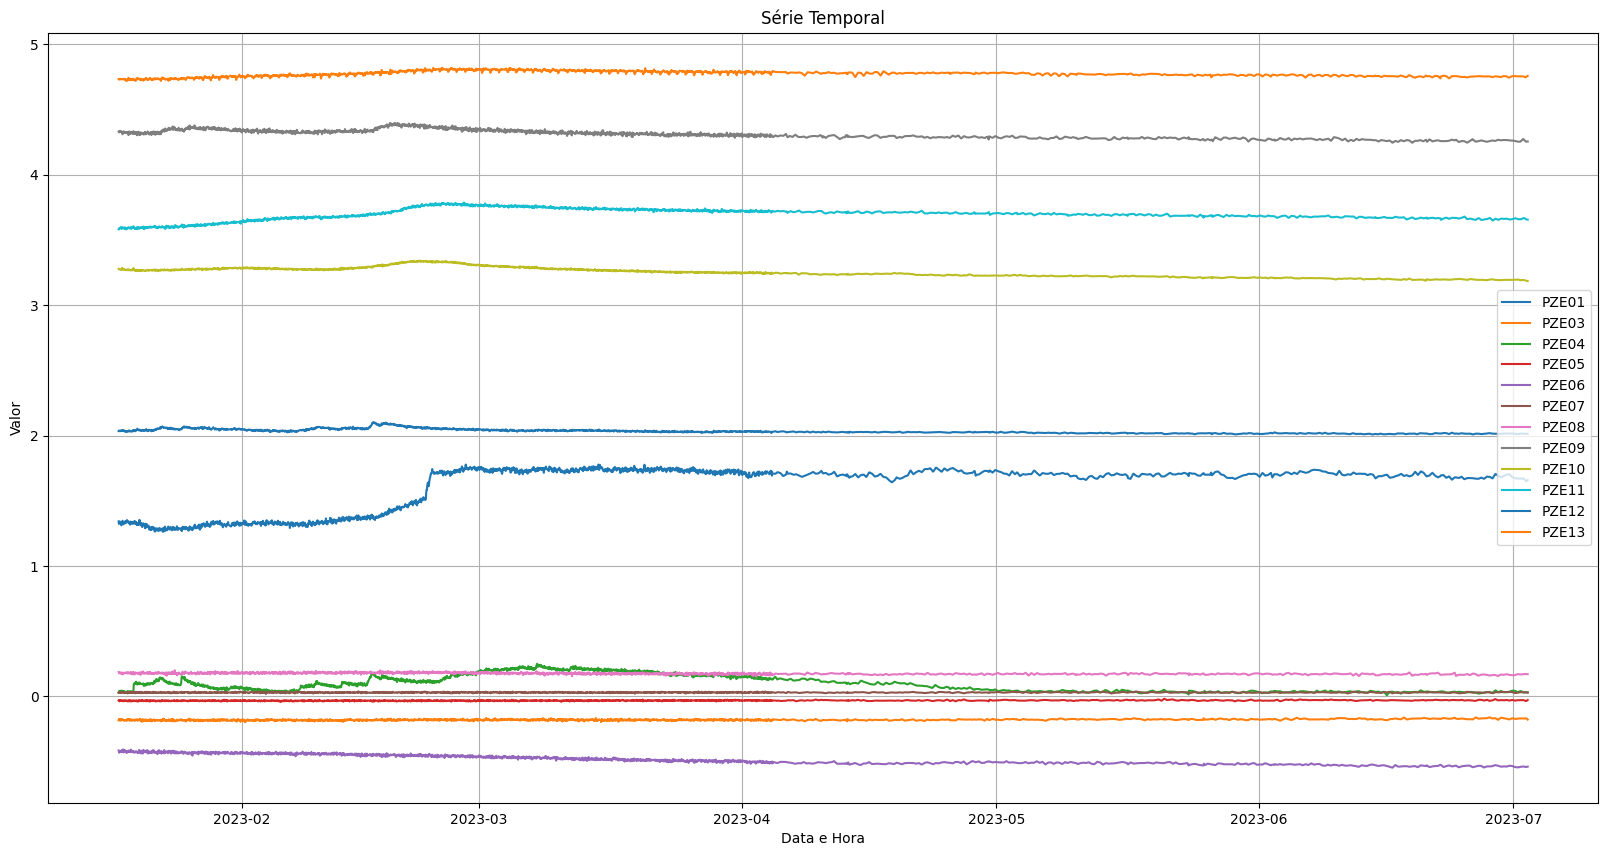

In [ ]:
# Plotar a série temporal
plt.figure(figsize=(20, 10))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Série Temporal')
plt.xlabel('Data e Hora')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

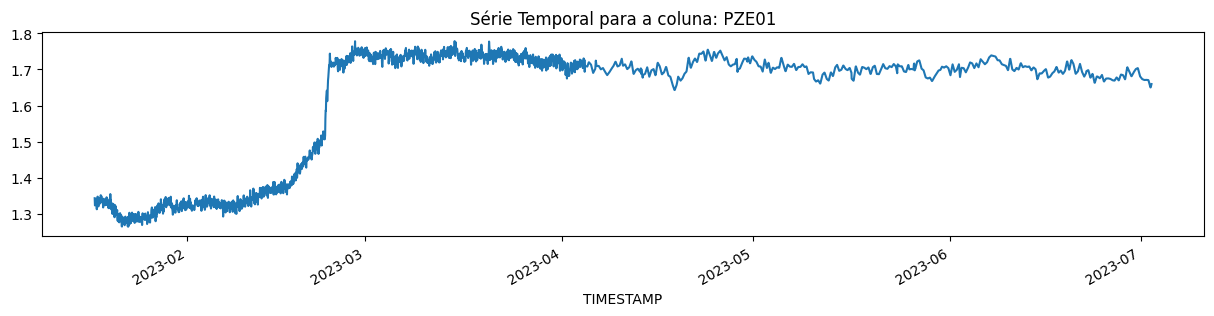

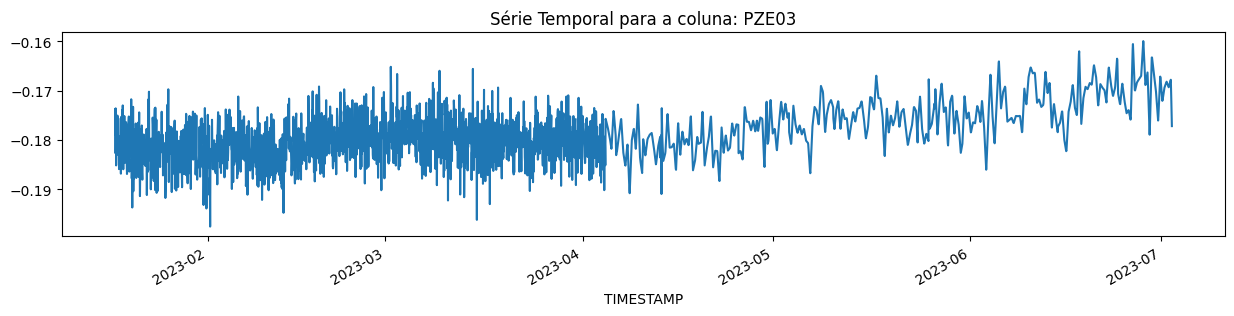

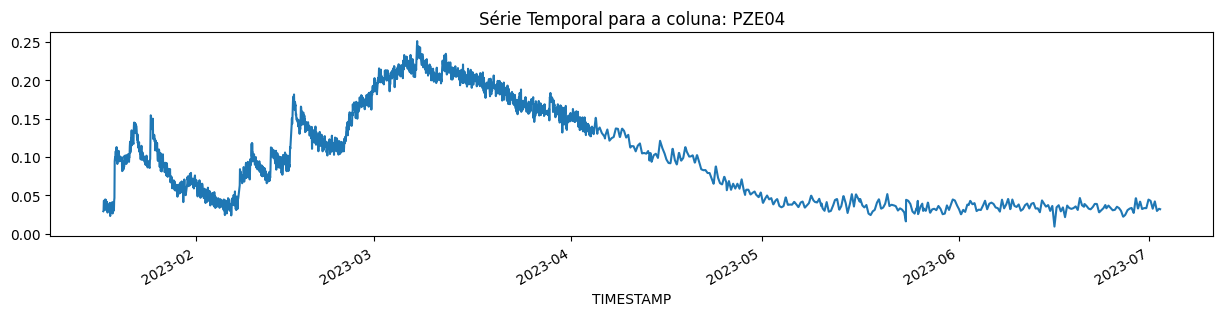

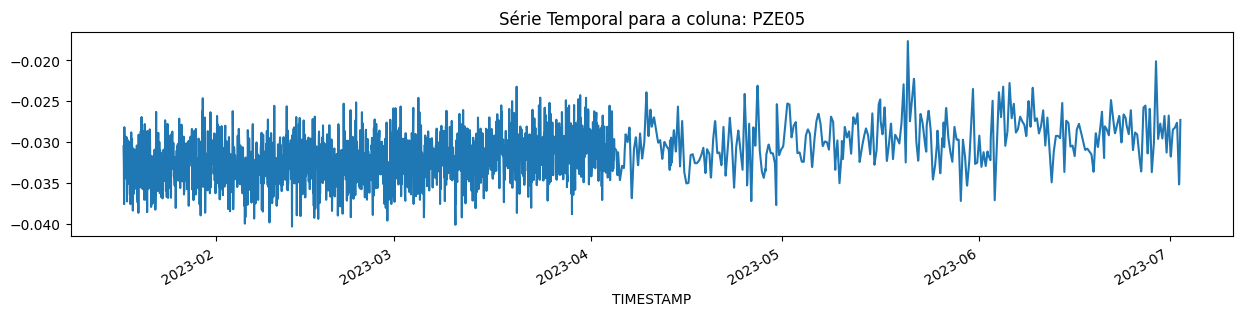

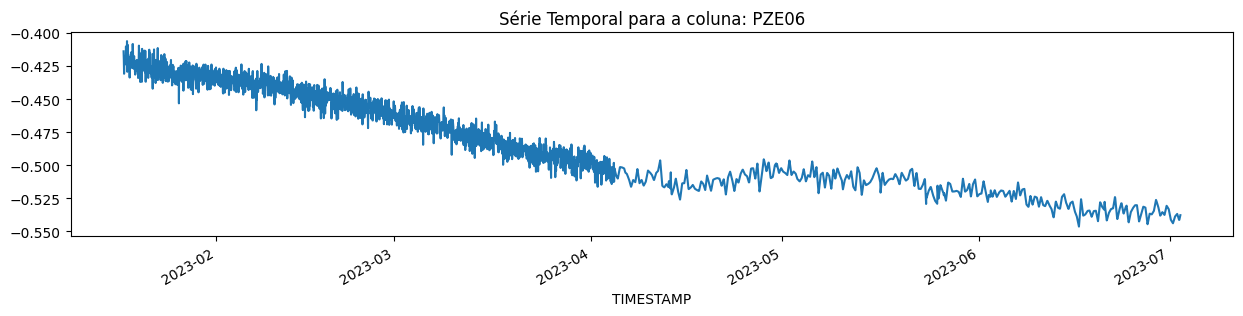

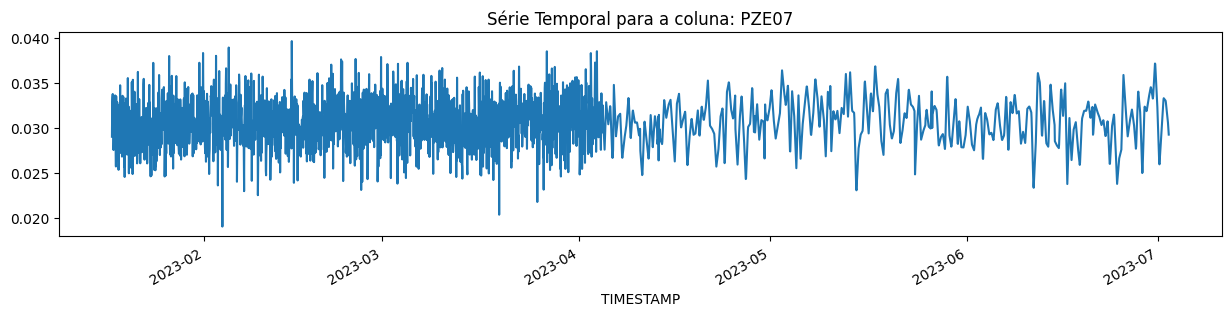

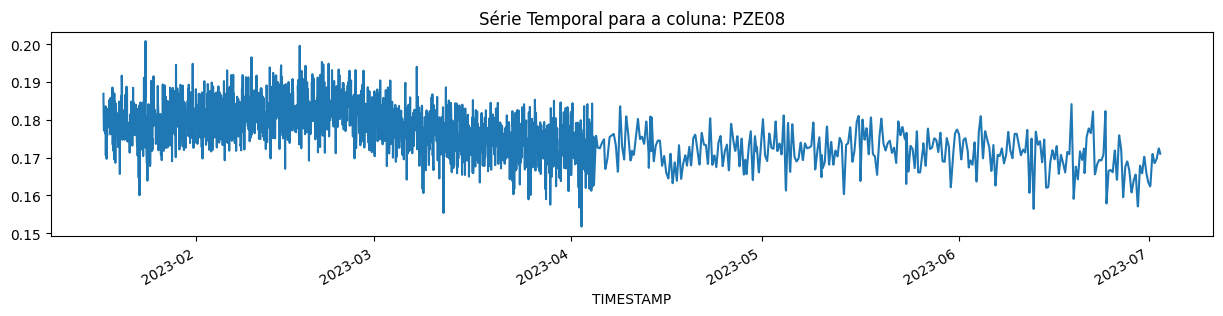

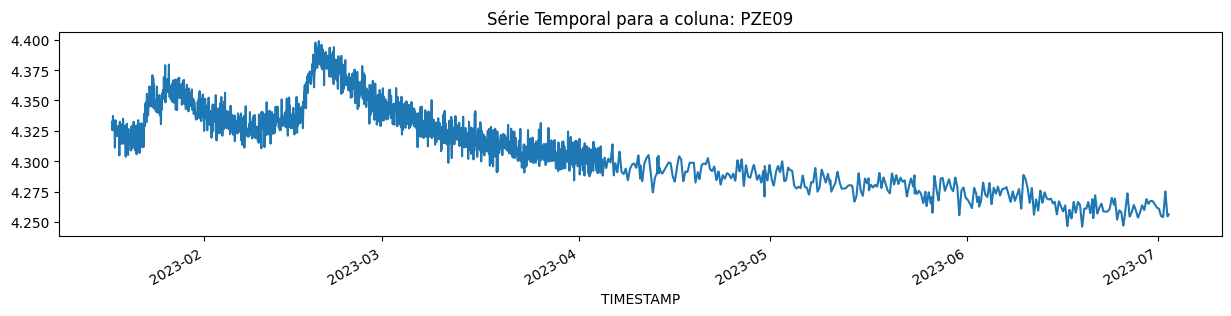

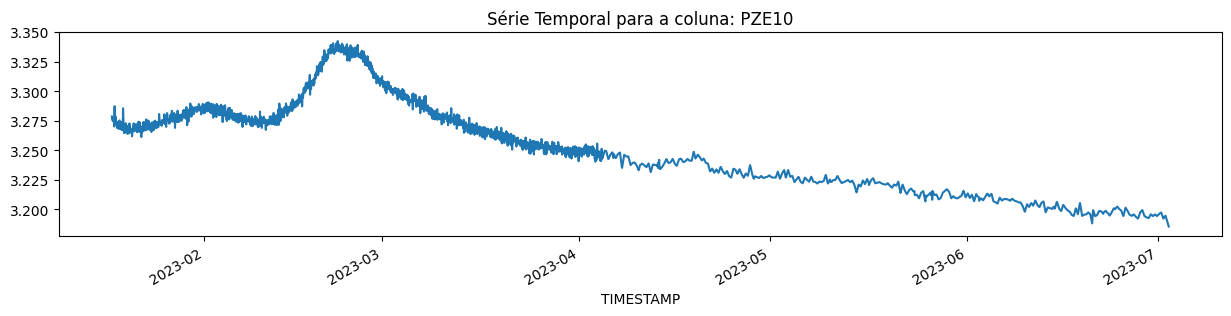

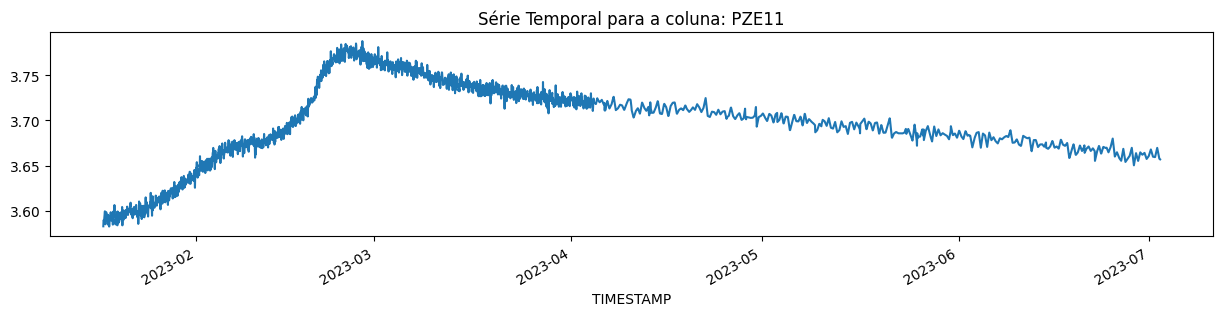

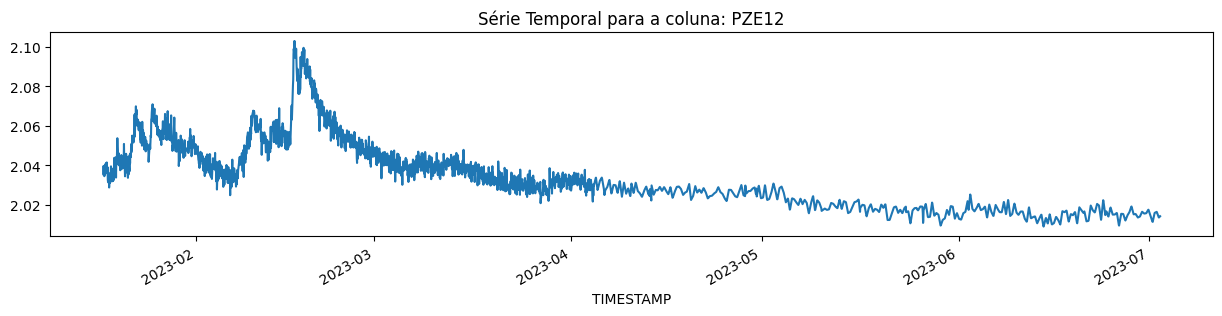

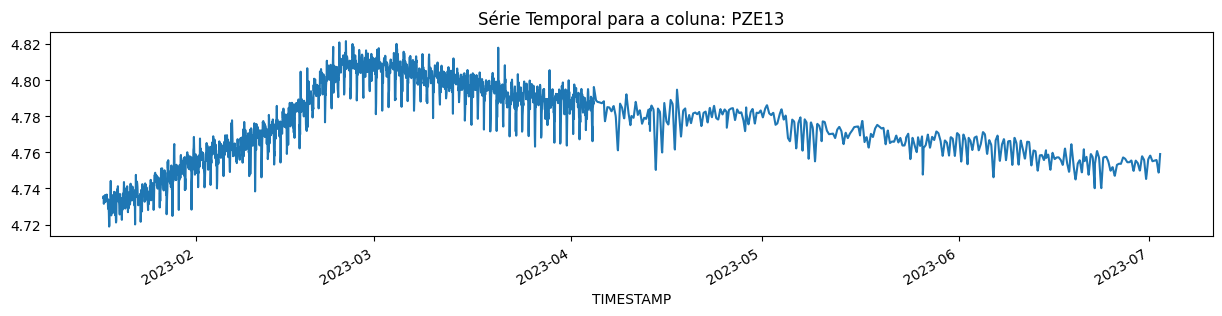

In [ ]:
# Iterar sobre as colunas do DataFrame original_df
for column in data.columns:
    # Calcular as diferenças consecutivas e plotar a série temporal de cada coluna
    data[column].plot(figsize=(15, 3))
    plt.title(f'Série Temporal para a coluna: {column}')
    plt.show()

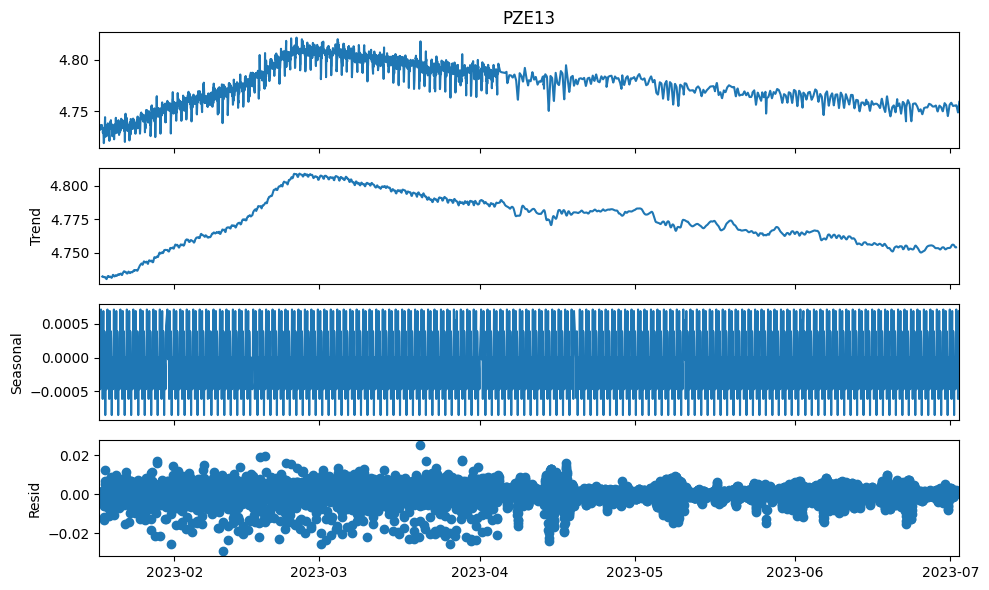

In [ ]:
# Decomposição da série temporal
result = seasonal_decompose(data['PZE13'], model='additive', period=30)

# Plotando os componentes
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

In [ ]:
#teste

# Criar uma instância do MinMaxScaler e ajustar apenas nos dados de treino
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Usar o scaler ajustado para transformar os dados de teste
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled

array([[ 0.85636577,  0.49932557,  0.0813149 , ...,  0.02444868,
         0.49917082,  0.08748973],
       [ 0.85921053,  0.50873447,  0.08578262, ...,  0.02558698,
         0.50629052,  0.09560338],
       [ 0.86196835,  0.51814337,  0.08983459, ...,  0.02672527,
         0.51341023,  0.10371703],
       ...,
       [ 0.75688708,  0.78138906,  0.06869574, ..., -0.146267  ,
         0.36472851,  0.04724389],
       [ 0.7628323 ,  0.7050804 ,  0.06809056, ..., -0.15160362,
         0.36354363,  0.04883797],
       [ 0.76851324,  0.6287722 ,  0.06755347, ..., -0.15693849,
         0.36235759,  0.05043204]])

In [ ]:
# Converter de volta para DataFrames, se necessário
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [ ]:
X_train_scaled_df

,PZE01,PZE03,PZE04,PZE05,PZE06,PZE07,PZE08,PZE09,PZE10,PZE11,PZE12
TIMESTAMP,,,,,,,,,,,
2023-01-17 11:00:00,0.152953,0.463627,0.056175,0.433552,0.937421,0.484352,0.716210,0.530250,0.529907,0.001382,0.277824
2023-01-17 12:00:00,0.114198,0.737802,0.059574,0.340332,0.884407,0.655538,0.586486,0.489303,0.508664,0.034329,0.323443
2023-01-17 13:00:00,0.123393,0.573038,0.114599,0.121145,0.799500,0.697472,0.517173,0.479957,0.507165,0.031736,0.278228
2023-01-17 14:00:00,0.140478,0.739001,0.112912,0.535776,0.869055,0.714828,0.622925,0.527391,0.505171,0.033774,0.281910
2023-01-17 15:00:00,0.148889,0.382865,0.100339,0.285633,0.872749,0.485876,0.556472,0.563848,0.500467,0.049521,0.267628
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30 11:00:00,0.844417,0.475179,0.065946,0.331387,0.118277,0.481590,0.430736,0.144914,0.019045,0.472883,0.061434
2023-05-30 12:00:00,0.844987,0.461690,0.063444,0.353567,0.122959,0.448856,0.400872,0.124213,0.019892,0.470694,0.057847
2023-05-30 13:00:00,0.847832,0.471099,0.067912,0.382498,0.111877,0.445688,0.369412,0.101099,0.021032,0.477813,0.063149


In [ ]:
X_test_scaled_df

,PZE01,PZE03,PZE04,PZE05,PZE06,PZE07,PZE08,PZE09,PZE10,PZE11,PZE12
TIMESTAMP,,,,,,,,,,,
2023-05-30 16:00:00,0.856366,0.499326,0.081315,0.469292,0.072383,0.519158,0.275032,0.031760,0.024449,0.499171,0.087490
2023-05-30 17:00:00,0.859211,0.508734,0.085783,0.498224,0.059218,0.543648,0.243572,0.008646,0.025587,0.506291,0.095603
2023-05-30 18:00:00,0.861968,0.518143,0.089835,0.527155,0.046054,0.567730,0.212112,-0.014468,0.026725,0.513410,0.103717
2023-05-30 19:00:00,0.861525,0.546888,0.092753,0.547052,0.051515,0.554986,0.224668,-0.005041,0.027633,0.541105,0.105370
2023-05-30 20:00:00,0.860892,0.585246,0.096922,0.574902,0.061512,0.536781,0.245415,0.013704,0.028603,0.534425,0.104930
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 13:00:00,0.750081,0.918900,0.069906,0.247597,-0.097677,0.578281,0.415645,-0.021202,-0.135597,0.372289,0.044056
2023-07-02 14:00:00,0.750942,0.857697,0.069301,0.329634,-0.090452,0.560379,0.409943,-0.018647,-0.140932,0.365913,0.045650
2023-07-02 15:00:00,0.756887,0.781389,0.068696,0.411670,-0.083227,0.538548,0.404241,-0.016093,-0.146267,0.364729,0.047244


In [ ]:
# Definir o grau do polinômio para o modelo de regressão polinomial
degree1 = 2  # Ou outro valor que você deseja testar
degree2 = 3  # Ou outro valor que você deseja testar

In [ ]:
# Criando o modelo Random Forest
#model = RandomForestRegressor(n_estimators=50, random_state=42)

#model = RandomForestRegressor(n_jobs=-1)

In [ ]:
# Inicializar modelos
lr = LinearRegression()
lr2 = Pipeline([('Poly', PolynomialFeatures(degree=degree1)),('linear', LinearRegression())])
lr3 = Pipeline([('Poly', PolynomialFeatures(degree=degree2)),('linear', LinearRegression())])
rf = RandomForestRegressor(n_estimators=50, random_state=42)
mlp1 = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp2 = MLPRegressor(hidden_layer_sizes=(50, 20), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp3 = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp4 = MLPRegressor(hidden_layer_sizes=(10, 20, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp5 = MLPRegressor(hidden_layer_sizes=(20, 30, 20), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp6 = MLPRegressor(hidden_layer_sizes=(10, 20, 30, 20, 10), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)



In [ ]:
# Lista para facilitar o treinamento e avaliação
models = [lr, lr2, lr3, rf, mlp1, mlp2, mlp3, mlp4, mlp5, mlp6]
model_names = ['Linear Regression', 'Linear Regression Poly1', 'Linear Regression Poly2', 'Random Forest', 'MLP 10', 'MLP 50-20', 'MLP 100', 'MLP 10-20-10', 'MLP 20-30-20', 'MLP 10-20-30-20-10']


In [ ]:
# Definir o intervalo para a re-treinamento para o # Walk-Forward Validation reduzido
n = 10  # Escolha um valor para 'n' baseado no seu caso de uso

In [ ]:
# Lista para armazenar os erros de previsão de cada passo
errors = []

In [ ]:
# Walk-Forward Validation reduzido
for i in range(0, len(X_test), n):
    # Atualizar os conjuntos de dados para a iteração atual do walk-forward
    # Certifique-se de não ultrapassar o fim do conjunto de dados
    end_idx = min(i + n, len(X_test))
    X_train_iter = pd.concat([X_train, X_test[:i]])
    y_train_iter = pd.concat([y_train, y_test[:i]])

    # Treinar modelos
    for model in models:
      model.fit(X_train_iter, y_train_iter)

    # Fazer previsões para o próximo bloco
    y_pred = model.predict(X_test.iloc[i:end_idx])

    # Calcular e armazenar os erros de previsão para o bloco atual
    errors.extend(mean_squared_error(y_test.iloc[i:end_idx], y_pred, multioutput='raw_values'))

    # Você pode querer calcular a média dos erros se estiver interessado em uma métrica de erro único
    mean_error = sum(errors) / len(errors)
    print(f"Erro médio: {mean_error}")

Erro médio: 1.2805357248737896e-05
Erro médio: 2.379863225291159e-05
Erro médio: 2.696966025618338e-05
Erro médio: 2.8097106334081682e-05
Erro médio: 2.8264221474273307e-05
Erro médio: 2.9002820410777333e-05
Erro médio: 3.2609754312455385e-05
Erro médio: 3.069515959213124e-05
Erro médio: 2.7330996459174123e-05
Erro médio: 2.486970453880473e-05
Erro médio: 2.3209973645177914e-05
Erro médio: 2.1757031220976066e-05
Erro médio: 2.2769580474073334e-05
Erro médio: 2.136934089753671e-05
Erro médio: 2.0254715307751717e-05
Erro médio: 2.3457039958852653e-05
Erro médio: 3.152658846150527e-05
Erro médio: 2.9865968865861498e-05
Erro médio: 3.28308312603509e-05
Erro médio: 3.1374581879277056e-05
Erro médio: 3.130325284969804e-05
Erro médio: 3.0224132568126036e-05
Erro médio: 2.929553316328319e-05
Erro médio: 2.855981471407136e-05
Erro médio: 2.7451293557561284e-05
Erro médio: 3.668815015913703e-05
Erro médio: 3.633572670407676e-05
Erro médio: 3.514219065433149e-05
Erro médio: 3.459783098064636e-05


In [ ]:
# Avaliar modelos e comparar resultados
results = {}
for (name, model) in zip(model_names, models):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse) # RMSE é simplesmente a raiz quadrada do MSE
    r2 = model.score(X_test, y_test)

    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

    print(f'{name} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}')


Linear Regression - MSE: 2.008364908898908e-05, MAE: 0.003386422483541293, RMSE: 0.004481478449015356, R2: 0.44133282358763337
Linear Regression Poly1 - MSE: 1.4049920557719698e-05, MAE: 0.002927809949386273, RMSE: 0.003748322365768411, R2: 0.6091731431862804
Linear Regression Poly2 - MSE: 1.017940805984634e-05, MAE: 0.0024342395682874904, RMSE: 0.0031905184625459137, R2: 0.7168392490256414
Random Forest - MSE: 3.7276985281904673e-07, MAE: 0.00042157212943402794, RMSE: 0.0006105488128061889, R2: 0.98963065525576
MLP 10 - MSE: 4.43134579899083e-05, MAE: 0.005553506898292636, RMSE: 0.006656835433590671, R2: -0.23266814424988658
MLP 50-20 - MSE: 5.4182919992031094e-05, MAE: 0.005934743172889632, RMSE: 0.007360904835142966, R2: -0.5072071209569635
MLP 100 - MSE: 3.8351908177847994e-05, MAE: 0.004912391285810143, RMSE: 0.006192891746013973, R2: -0.06683562119652486
MLP 10-20-10 - MSE: 1.950618388436227e-05, MAE: 0.0035495694435079238, RMSE: 0.004416580564686018, R2: 0.45739618208965604
MLP 

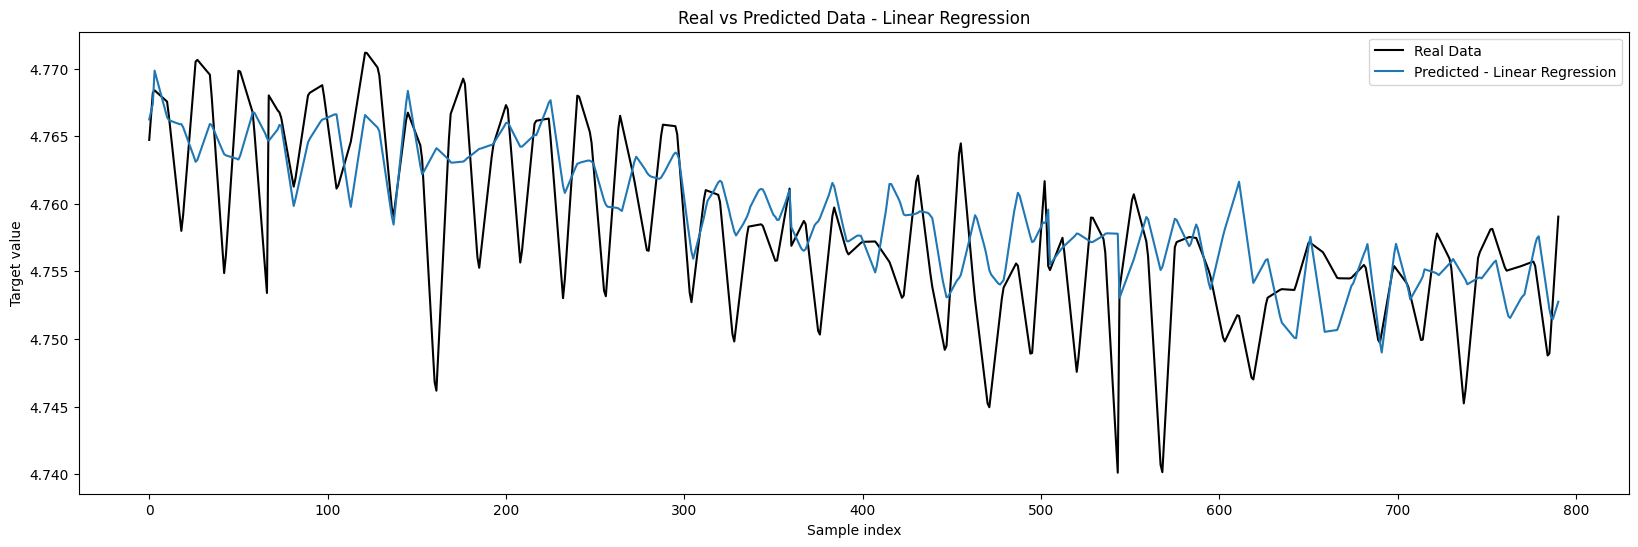

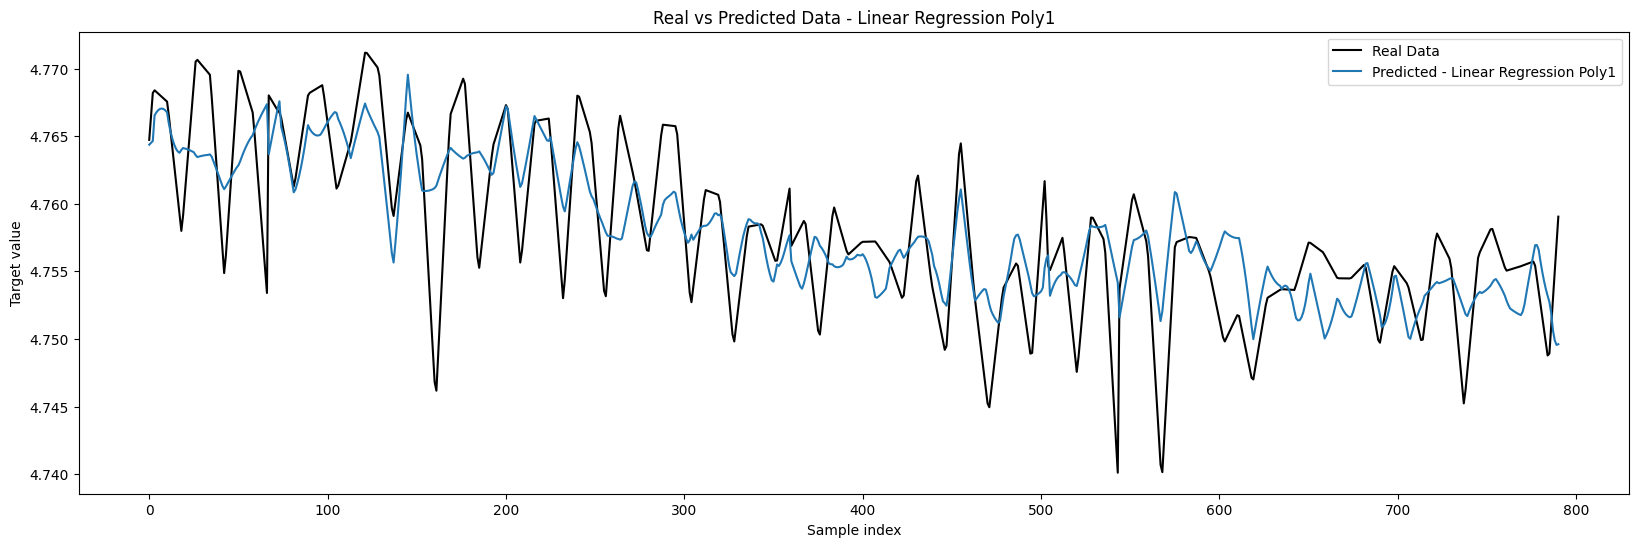

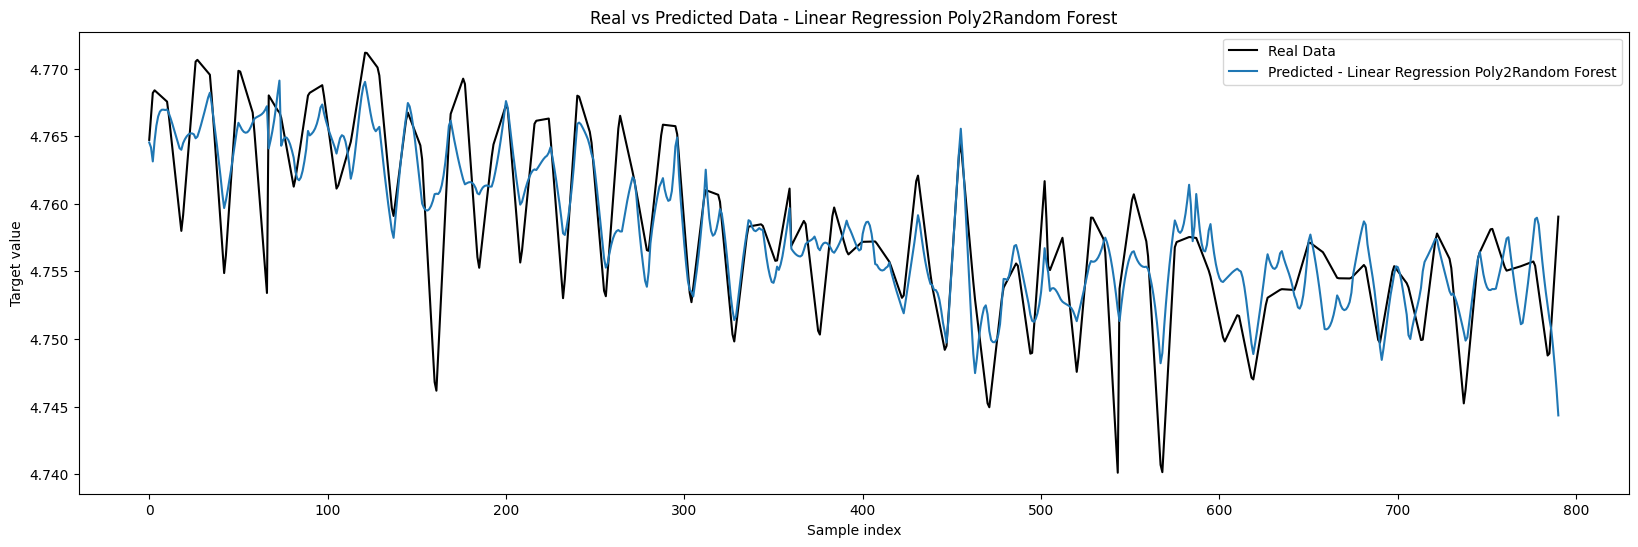

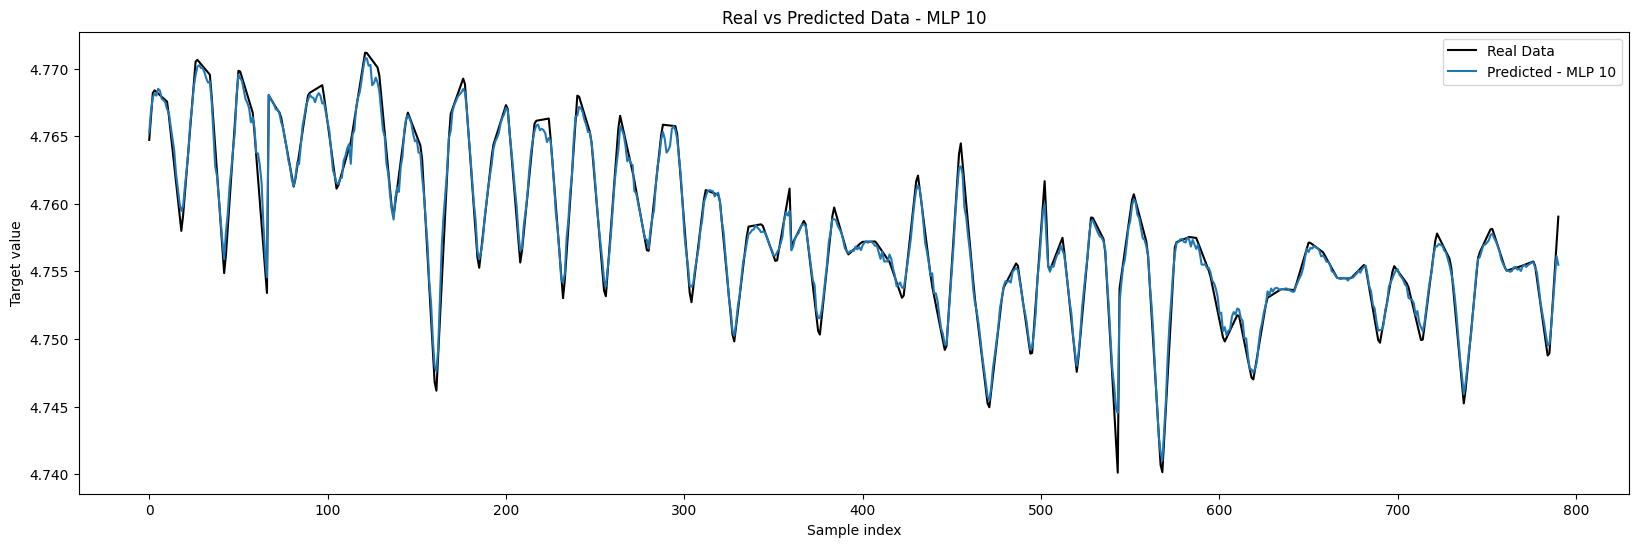

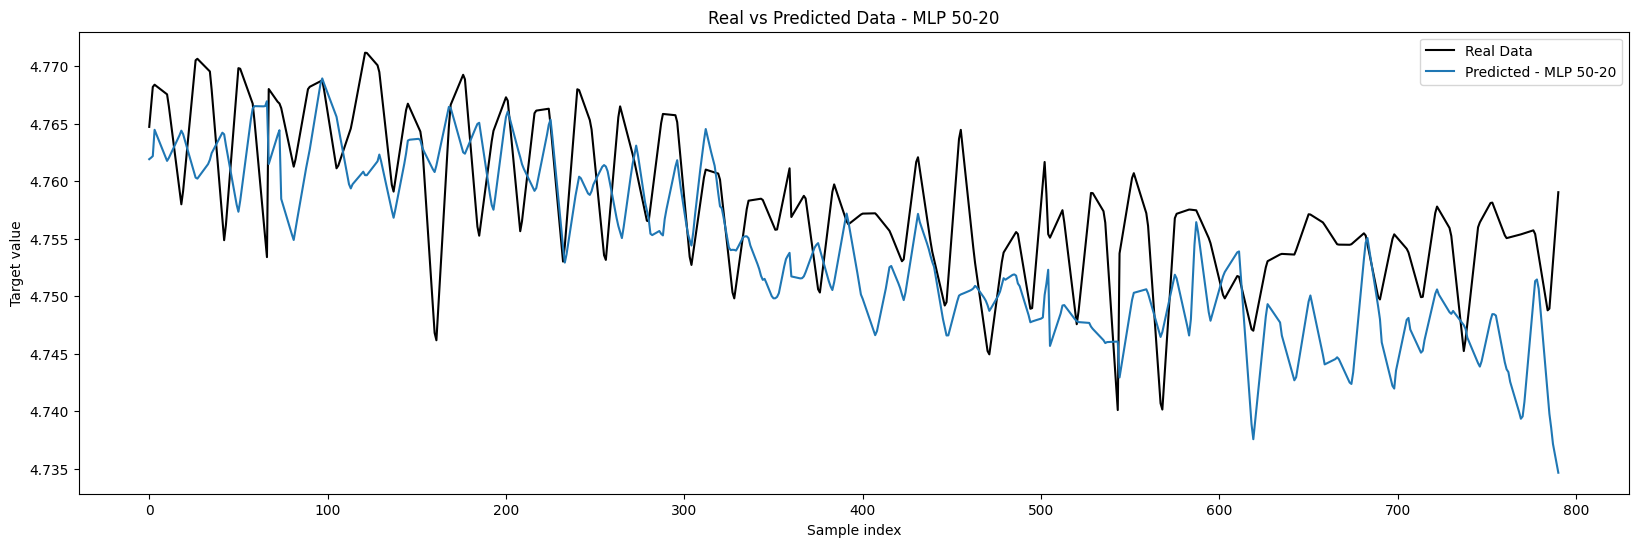

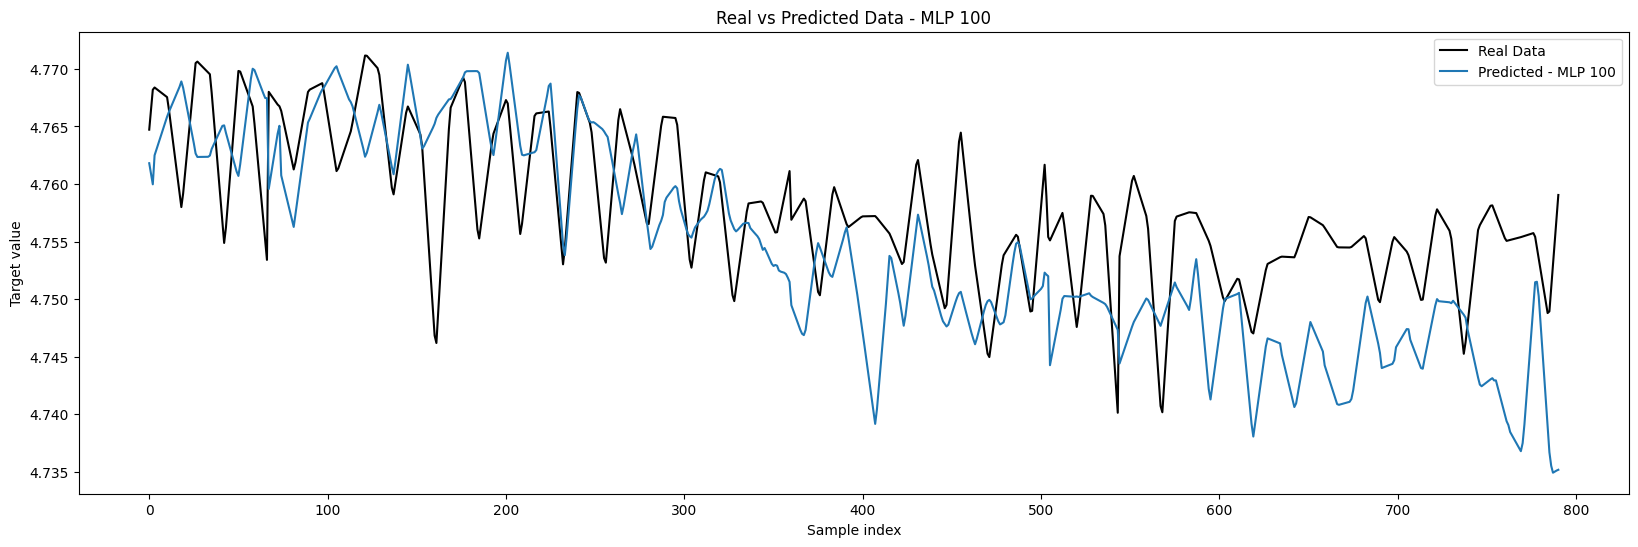

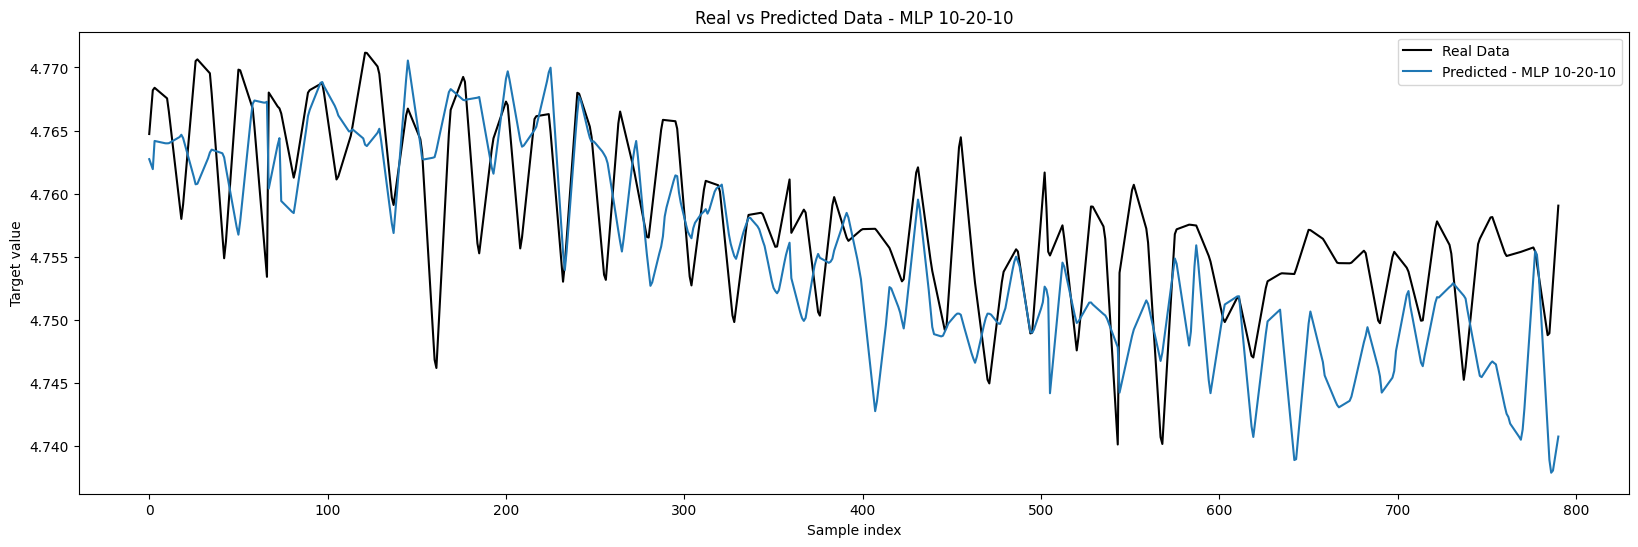

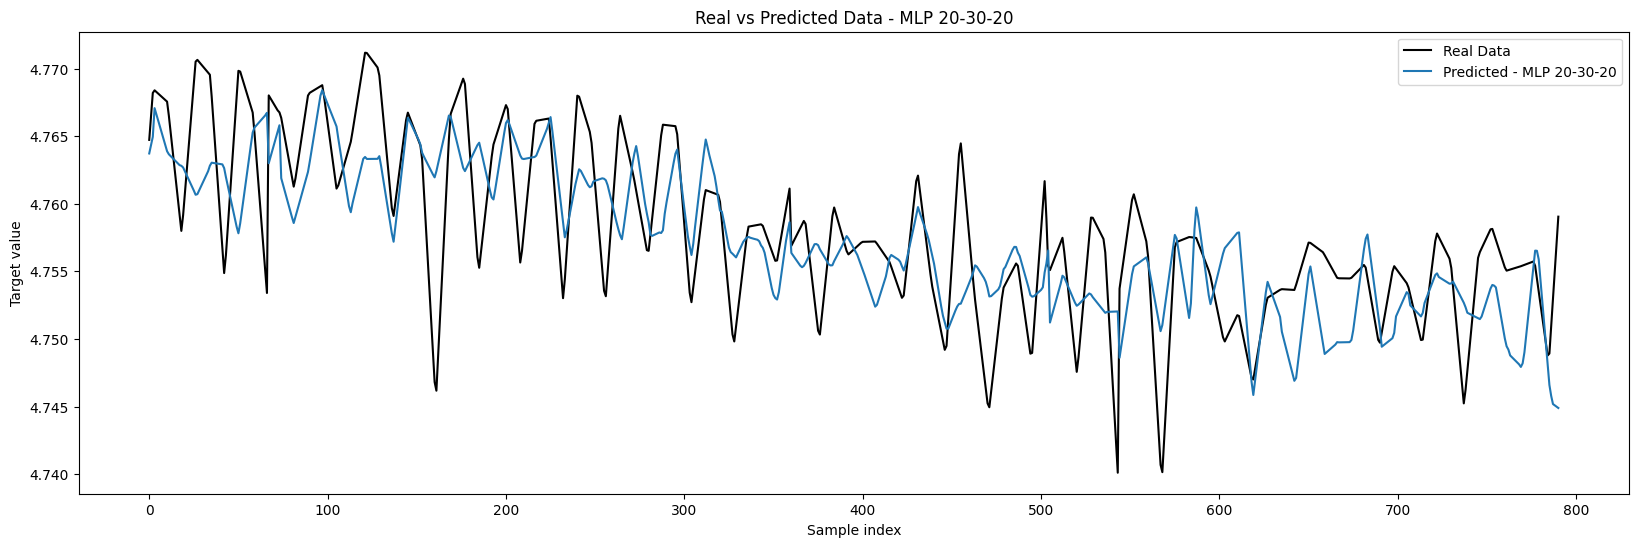

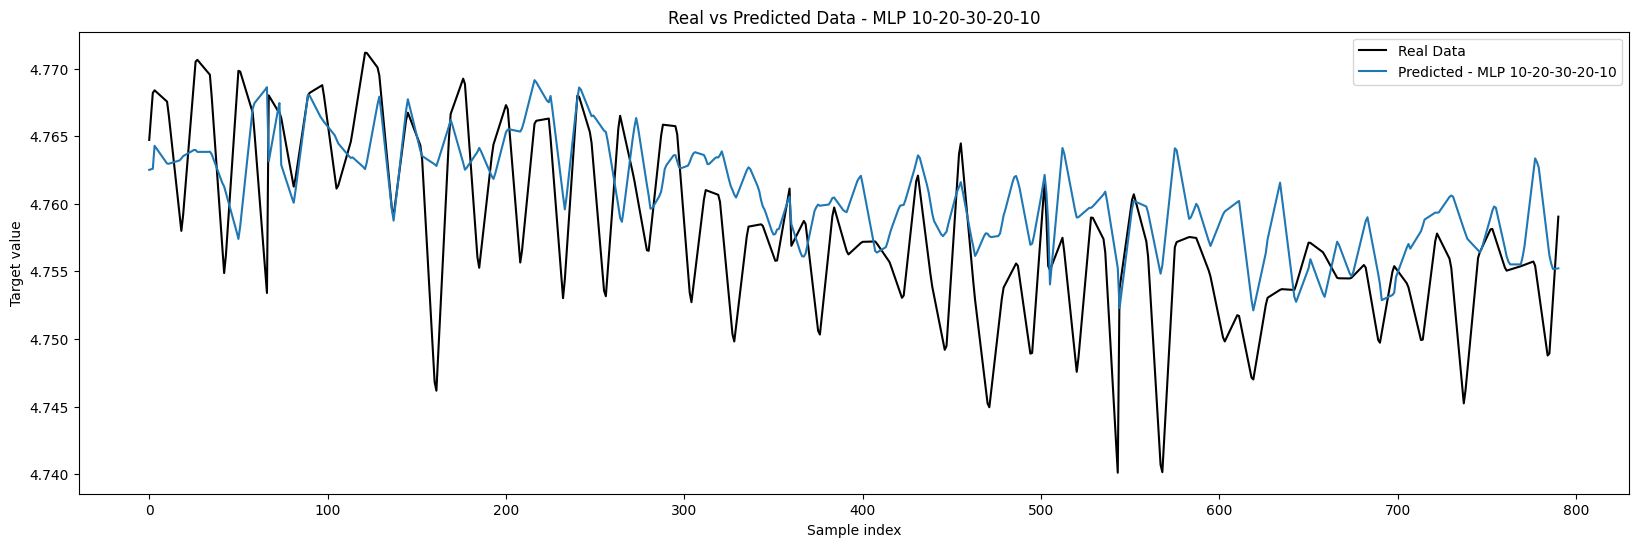

In [ ]:
# Supondo que você tenha as variáveis y_test, model_names, models e X_test definidas anteriormente

# Plotar resultados reais vs. previsões para cada modelo em figuras separadas
for (name, model) in zip(model_names, models):
    plt.figure(figsize=(20, 6))  # Cria uma nova figura para cada modelo
    plt.plot(y_test.values, label='Real Data', color='black')

    # Obter previsões do modelo
    predictions = model.predict(X_test)

    # Plotar previsões do modelo na figura atual
    plt.plot(predictions, label=f'Predicted - {name}')

    # Adicionando título e legenda
    plt.title(f'Real vs Predicted Data - {name}')
    plt.xlabel('Sample index')
    plt.ylabel('Target value')
    plt.legend()

    # Mostrar o gráfico
    plt.show()


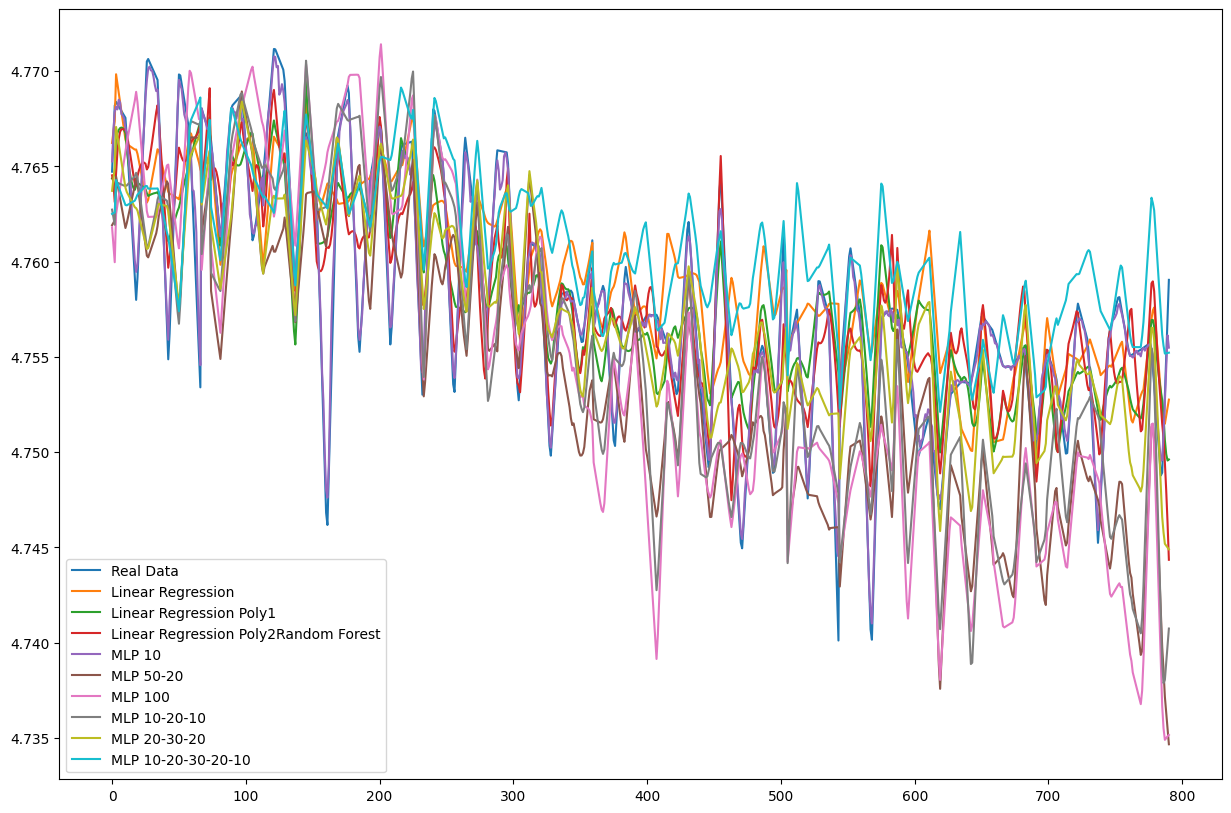

In [ ]:

# Plotar resultados reais vs. previsões para comparar visualmente
plt.figure(figsize=(15, 10))
plt.plot(y_test.values, label='Real Data')
for (name, model) in zip(model_names, models):
    predictions = model.predict(X_test)
    plt.plot(predictions, label=name)
plt.legend()
plt.show()